In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import geopandas as gpd

In [75]:
amphibians = pd.read_csv("ERL_Pulse\\Amphibians\\European Red List of Amphibians 2025 - all species assessments.csv")
bees = pd.read_csv("ERL_Pulse\\Bees\\European Red List of Bees 2025 - all species assessments.csv")
butterflies = pd.read_csv("ERL_Pulse\\Butterflies\\European Red List of Butterflies 2025 - all species assessments.csv")
reptiles = pd.read_csv("ERL_Pulse\\Reptiles\\European Red List of Reptiles 2025 - all species assessments.csv")

In [77]:
print(f'Amphibians shape: {amphibians.shape}\nBees shape: {bees.shape}\nButterflies shape: {butterflies.shape}\nReptiles shape: {reptiles.shape}\n')

Amphibians shape: (99, 12)
Bees shape: (2159, 12)
Butterflies shape: (504, 12)
Reptiles shape: (205, 12)



In [ ]:
selected_columns = [
    "assessment_id",             # link to GEM polygons
    "internal_taxon_id",         # link to GEM polygons
    "internal_taxon_name",       # scientific name
    # If you merge common names later, you can add 'common_name'
    "PopulationContinuingDecline.isDeclining",   # population trend
    "HabitatContinuingDecline.isDeclining",      # habitat trend
    "SevereFragmentation.isFragmented",          # fragmentation
    "ElevationLower.limit",                       # elevation filter
    "ElevationUpper.limit",                       # elevation filter
    "DepthLower.limit",                           # aquatic depth filter
    "DepthUpper.limit",                           # aquatic depth filter
    "PopulationReductionPast.direction",          # past declines
    "PopulationReductionFuture.direction",        # projected declines
    "ThreatsUnknown.value"                        # threat info for tooltip
]
allfields[selected_columns].head()

,assessment_id,internal_taxon_id,internal_taxon_name,PopulationContinuingDecline.isDeclining,HabitatContinuingDecline.isDeclining,SevereFragmentation.isFragmented,ElevationLower.limit,ElevationUpper.limit,DepthLower.limit,DepthUpper.limit,PopulationReductionPast.direction,PopulationReductionFuture.direction,ThreatsUnknown.value
0,207979274,977,Alytes muletensis,Yes,Yes,No,10.0,850.0,NaN,NaN,NaN,NaN,False
1,207979535,6714,Discoglossus montalentii,Unknown,Yes,No,80.0,1900.0,NaN,NaN,NaN,NaN,False
2,207980155,55266,Alytes cisternasii,Unknown,Yes,No,100.0,1300.0,NaN,NaN,NaN,NaN,False
3,207980412,55271,Discoglossus sardus,NaN,Yes,No,0.0,1770.0,NaN,NaN,NaN,NaN,False
4,207981785,58592,Pelophylax epeiroticus,Unknown,Yes,Unknown,0.0,500.0,NaN,NaN,NaN,NaN,False


In [ ]:
gdf = gpd.read_file("ERL_Pulse_Amphibians\\Spatial data\\Amphibian_maps_all_geopackage.gpkg")

              SCI_NAME  presence  origin  seasonal              compiler  \
0   Alytes almogavarii         1       1         1  Christophe Dufresnes   
1  Alytes obstetricans         5       1         1       D. Allen (IUCN)   
2  Alytes obstetricans         1       1         1       D. Allen (IUCN)   
3    Bombina variegata         1       1         1                  IUCN   
4    Bombina variegata         2       1         1                  IUCN   

                                            citation  \
0  IUCN (International Union for Conservation of ...   
1                       European Red List; EC & IUCN   
2                       European Red List; EC & IUCN   
3                       European Red List; EC & IUCN   
4                       European Red List; EC & IUCN   

                                              source dist_comm island  \
0                                                                       
1  ASG distribtion maps; Dufresnes & Martínez-Sol...        

c:\Users\jaden\anaconda3\envs\cogs118a\Lib\site-packages\pyogrio\geopandas.py:275: UserWarning: More than one layer found in 'Amphibian_maps_all_geopackage.gpkg': 'Amphibian_maps_GE' (default), 'Amphibian_maps_GEM', 'Amphibian_maps_Europe'. Specify layer parameter to avoid this warning.
  result = read_func(


<Axes: >

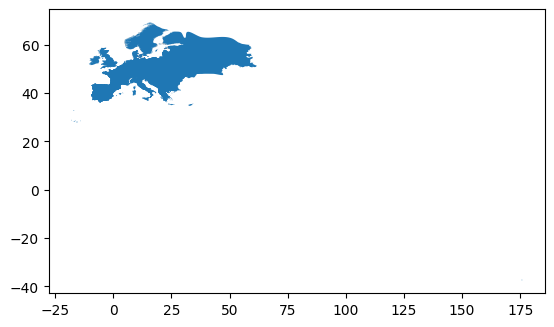

In [30]:
gdf.plot()

In [53]:
gdf_merged = gdf.merge(redlist, left_on="ASSESSMENT", right_on="assessment_id", how="left")
gdf_merged.columns
# gdf_merged.to_file("amphibians_merged.geojson", driver="GeoJSON") # convert to geojson for D3.js

Index(['SCI_NAME', 'presence', 'origin', 'seasonal', 'compiler', 'citation',
       'source', 'dist_comm', 'island', 'subspecies', 'subpop', 'legend',
       'tax_comm', 'yrcompiled', 'data_sens', 'sens_comm', 'generalisd',
       'id_no', 'Shape_Leng', 'ASSESSMENT', 'Sci_name_1', 'geometry', 'Order',
       'Family', 'Species name', 'Taxonomic authority', 'Common name',
       'taxon_id', 'assessment_id', 'European category',
       'EU 27 regional category', 'Endemic to Europe', 'Endemic to EU 27',
       'Link to assessment'],
      dtype='object')

<Axes: xlabel='presence'>

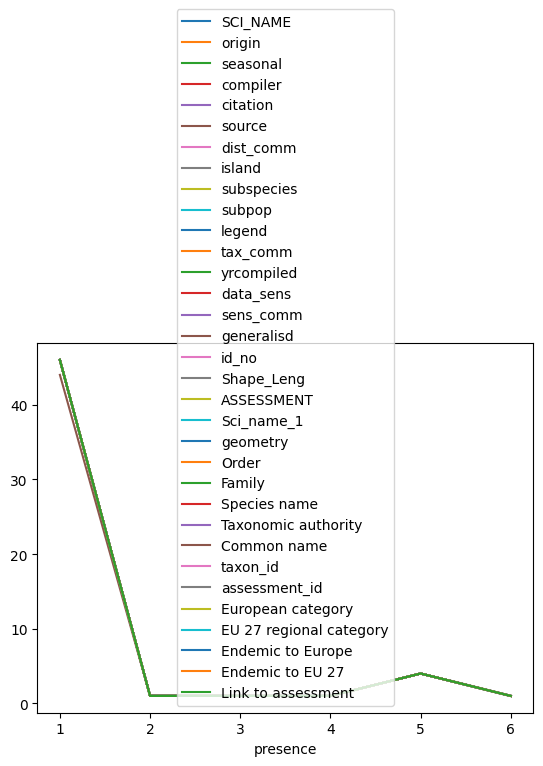

In [71]:
gdf_merged.groupby('presence').count().plot()

In [73]:
redlist.shape

(99, 12)